In [15]:
### preliminary work
import pandas as pd
import chardet
import matplotlib.pyplot as plt
file = 'nytcrosswords.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
df = pd.read_csv(file, encoding = result['encoding'])


df.describe()
#34 missing word values (781,573 minus 781539) (NULL)
#10207 unique dates, 63,313 unique words check after NULL adjustment, 493935 clues (makes sense, more clues than words)
#puzzle with most clues is 5/16/1999 (181 words) (mode?), most common word is ERA
#most common clue is "JAI ___" - common crossword word with fewer uses/contexts than similar words ('ALAI')

,Date,Word,Clue
count,781573,781539,781573
unique,10207,63313,493935
top,5/16/1999,ERA,Jai ___
freq,181,634,122


In [16]:
#Investigate null values


nullmask = df.isnull().any(axis = 1)
nullrows = df[nullmask]
print(nullrows)
#lol, the null values are originally the word "NULL"! Need to replace Nans with "NULL"
df['Word'] = df ['Word'].fillna('NULL') #comment out to see

              Date Word                   Clue
24006   12/24/2020  NaN                   Zero
43275    4/17/2020  NaN                  Empty
67323     6/7/2019  NaN            Of no value
93805    6/24/2018  NaN     No longer in force
141809   10/1/2016  NaN    { }, in mathematics
157990    3/3/2016  NaN  Having no legal force
176711    7/2/2015  NaN                Invalid
189051   1/22/2015  NaN                  Empty
195559  10/29/2014  NaN                   Void
229912    8/7/2013  NaN   Empty, as a math set
251214  10/31/2012  NaN          Lacking value
295562   3/30/2011  NaN         Empty, in math
344370    7/1/2009  NaN                   Zero
350968    4/6/2009  NaN           ___ and void
447651  10/23/2005  NaN                Invalid
480418   8/18/2004  NaN                   Zero
488526    5/5/2004  NaN        No longer legal
510877   7/19/2003  NaN   Lacking any elements
522564   2/17/2003  NaN          Without value
540417   6/30/2002  NaN            Nonexistent
541820   6/11

In [18]:
#Want to be able to work with dates 
# Make sure dates are date objects and add column that indicates day of week (PD: Monday = 0 thru Sunday = 6)
df['Date'] = pd.to_datetime(df['Date'])
df['DayofWeek'] = df['Date'].dt.weekday
df['Date'].describe()

count                           781573
mean     2007-11-06 12:23:01.220692480
min                1993-11-21 00:00:00
25%                2000-11-08 00:00:00
50%                2007-11-04 00:00:00
75%                2014-11-01 00:00:00
max                2021-10-31 00:00:00
Name: Date, dtype: object

In [20]:
# Want to examine Word lengths, make separate column
df['lengths'] = df['Word'].apply(len)
df.describe()
# count values are all the same, confirms no nulls!

,Date,DayofWeek,lengths
count,781573,781573.000000,781573.000000
mean,2007-11-06 12:23:01.220692480,3.241489,4.795542
min,1993-11-21 00:00:00,0.000000,1.000000
25%,2000-11-08 00:00:00,1.000000,4.000000
50%,2007-11-04 00:00:00,3.000000,4.000000
75%,2014-11-01 00:00:00,5.000000,5.000000
max,2021-10-31 00:00:00,6.000000,22.000000
std,NaN,2.134204,1.675419


In [26]:
#Want to examine vowel:consonant relationships in words.
#Make function that calculates proportion of vowels to word, make new col with this info

def vowelratio(myword):
    """
    Vowel Ratio Function:
    Input: word as string
    Returns: float representing proportion of vowels to the length of the total word
    """
    
    vowelcount = myword.count('A') + myword.count('E') + myword.count('I')\
                + myword.count('O') + myword.count('U') + myword.count('Y')
    
    return round((vowelcount/len(myword)), 3)

df['vowelratio'] = df['Word'].apply(vowelratio)

,Date,Word,Clue,DayofWeek,lengths,vowelratio
0,2021-10-31,PAT,"Action done while saying ""Good dog""",6,3,0.333
1,2021-10-31,RASCALS,Mischief-makers,6,7,0.286
2,2021-10-31,PEN,It might click for a writer,6,3,0.333
3,2021-10-31,SEP,Fall mo.,6,3,0.333
4,2021-10-31,ECO,Kind to Mother Nature,6,3,0.667


In [21]:
#prelim looking around- most common words
wordcounts = df['Word'].value_counts()
wordcounts

Word
ERA                634
AREA               534
ERE                510
ONE                510
ELI                493
                  ... 
COOKIESANDCREAM      1
BIGBANDS             1
PATPAULSEN           1
HIKEUP               1
YELLOWER             1
Name: count, Length: 63314, dtype: int64

Text(0.5, 1.0, 'Most Common Words in NYT Crossword Puzzles 1993-2021')

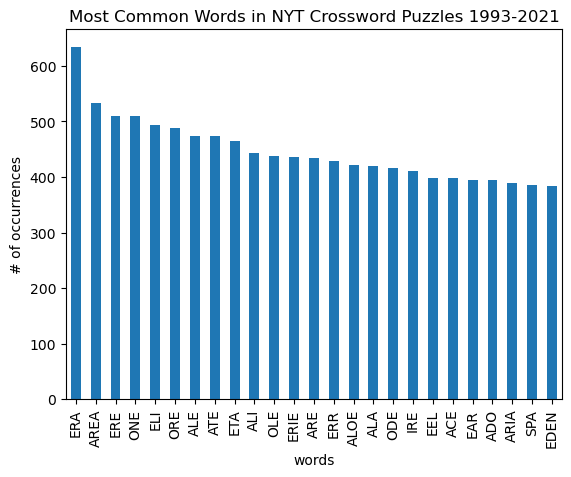

In [28]:
#most commonly used words
ax = wordcounts[:25].plot(kind = 'bar')
ax.set_ylabel('# of occurrences')
ax.set_xlabel('words')
ax.set_title('Most Common Words in NYT Crossword Puzzles 1993-2021')

Text(0.5, 1.0, 'Three to Five Letter Words Dominate')

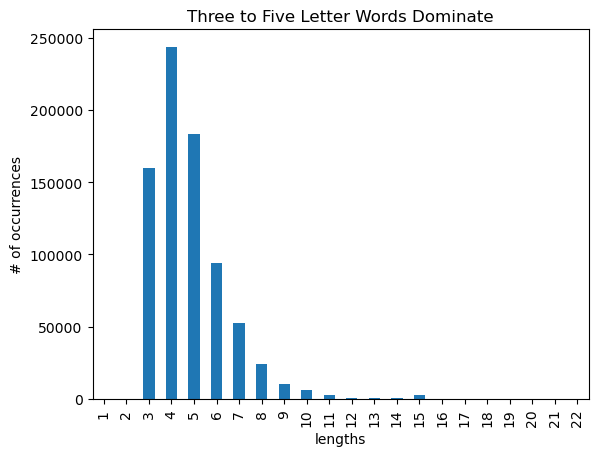

In [41]:
lengthcount = df.value_counts('lengths').sort_index().plot(kind = 'bar')
lengthcount.set_ylabel('# of occurrences')
lengthcount.set_title('Three to Five Letter Words Dominate')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781573 entries, 0 to 781572
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        781573 non-null  datetime64[ns]
 1   Word        781573 non-null  object        
 2   Clue        781573 non-null  object        
 3   DayofWeek   781573 non-null  int32         
 4   lengths     781573 non-null  int64         
 5   vowelratio  781573 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 32.8+ MB


In [73]:
df['DayofWeek'].value_counts() #number of clues basically goes down throughout week (words get longer)

DayofWeek
6    185922
0    106971
1    105562
2    103910
3    100480
4     90534
5     88194
Name: count, dtype: int64

In [75]:
df['lengths'].value_counts() #want to examine the words with the least-common lengths.
# 1, 2, 16 through 22

outliers = [1, 2]
outliermask = df['lengths'].isin(outliers)
shorts = df[outliermask]
shorts
#two letter words are quite rare, NO and PI. What is the one-letter word?:
#64-Across, in 23-Down. Clues are not numbered or directioned in this dataset, instead of finding all this
#go to actual puzzle: https://www.xwordinfo.com/Crossword?date=10/31/2013
# 'DRACULA, in MIRRORS'= blank answer!

,Date,Word,Clue,DayofWeek,lengths,vowelratio
80172,2018-12-20,NO,"With 38-Across, what a two-letter answer is in...",3,2,0.5
80174,2018-12-20,NO,See 35-Across,3,2,0.5
223435,2013-10-31,,"64-Across, in 23-Down",3,1,0.0
485629,2004-06-12,PI,It's just past three,5,2,0.5


In [81]:
#these less-common lengths are not long words, but rather proper nouns or turns of phrase (or turns on them)

outliers = range(16, 23)
outliermask = df['lengths'].isin(outliers)
longwords = df[outliermask]
pd.set_option('display.max_rows', 75)
longwords.sort_values(by = 'lengths', ascending = False)

,Date,Word,Clue,DayofWeek,lengths,vowelratio
76762,2019-02-03,THETRUTHWILLSETYOUFREE,"Seeming opposite of ""Ignorance is bliss""",6,22,0.409
215356,2014-02-13,ITSAMADMADMADMADWORLD,"1963 movie with the tagline ""Everybody who's e...",3,21,0.333
260451,2012-07-01,BORNONTHEFOURTHOFJULY,"See 28-, 39-, 45-, 83-, 95- and 107-Across",6,21,0.381
204390,2014-07-06,THESTARSPANGLEDBANNER,"This puzzle's theme, whose first notes are ind...",6,21,0.286
302230,2011-01-02,ATREEGROWSINBROOKLYN,"1943 novel ""Whaddya Tink? A Sapling Stays a Sa...",6,20,0.400
425623,2006-08-06,GROSSNATIONALCONDUCT,Nose-picking and belching in the White House?,6,20,0.350
24814,2020-12-13,RAIDERSOFTHELOSTARK,Indy film? (1981),6,19,0.368
378484,2008-04-13,SERMONONTHEDISMOUNT,Some moralizing about getting off a balance beam?,6,19,0.368
347298,2009-05-24,HOPESPRINGSETERNAL,*Alexander Pope phrase appropriate to the star...,6,18,0.333
159905,2016-02-07,TABLEOFDISCONTENTS,Ones giving the waiter a hard time?,6,18,0.333


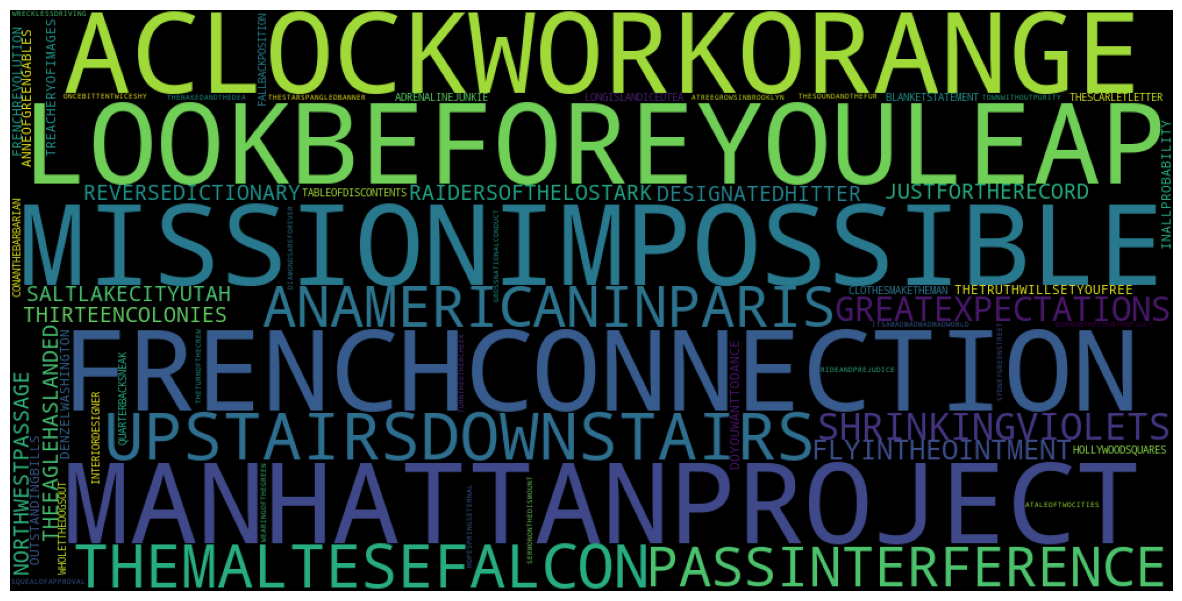

In [86]:
#messing with wordcloud- probably not a great device to use here, but it works!
from wordcloud import WordCloud
x = longwords['Word'].tolist()
unique_string = (' ').join(x)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# http://amueller.github.io/word_cloud/

In [69]:
satmask = df['dayofweek'] == 5
sat = df[satmask]
monmask = df['dayofweek'] == 0
mon = df[monmask]

<Axes: xlabel='lengths'>

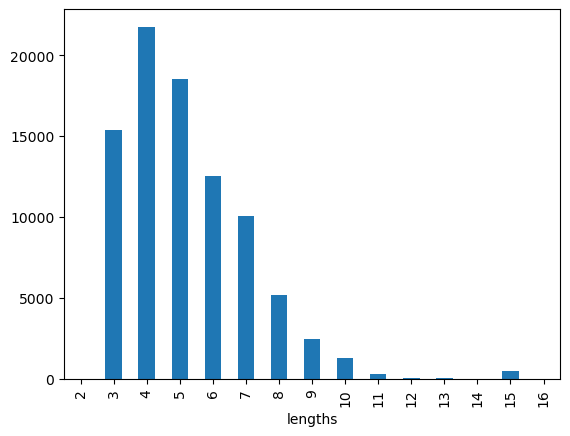

In [72]:
sat.value_counts('lengths').sort_index().plot(kind = 'bar')

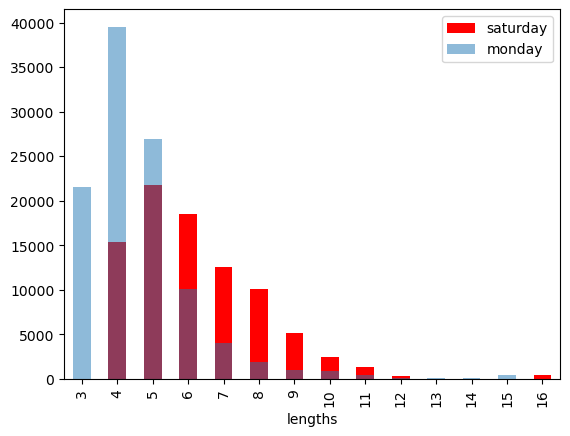

In [85]:
fig,ax = plt.subplots()
sat.value_counts('lengths').sort_index().plot(kind = 'bar', ax = ax, color = 'red', label = 'saturday')
mon.value_counts('lengths').sort_index().plot(kind = 'bar', ax = ax, alpha = .5, label = 'monday')
plt.legend()